## Feed Forward Neural Network

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8538 - loss: 0.4951
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9538 - loss: 0.1550
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9664 - loss: 0.1130
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9731 - loss: 0.0892
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9761 - loss: 0.0723
313/313 - 1s - 3ms/step - accuracy: 0.9773 - loss: 0.0770

Test accuracy: 0.9772999882698059
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


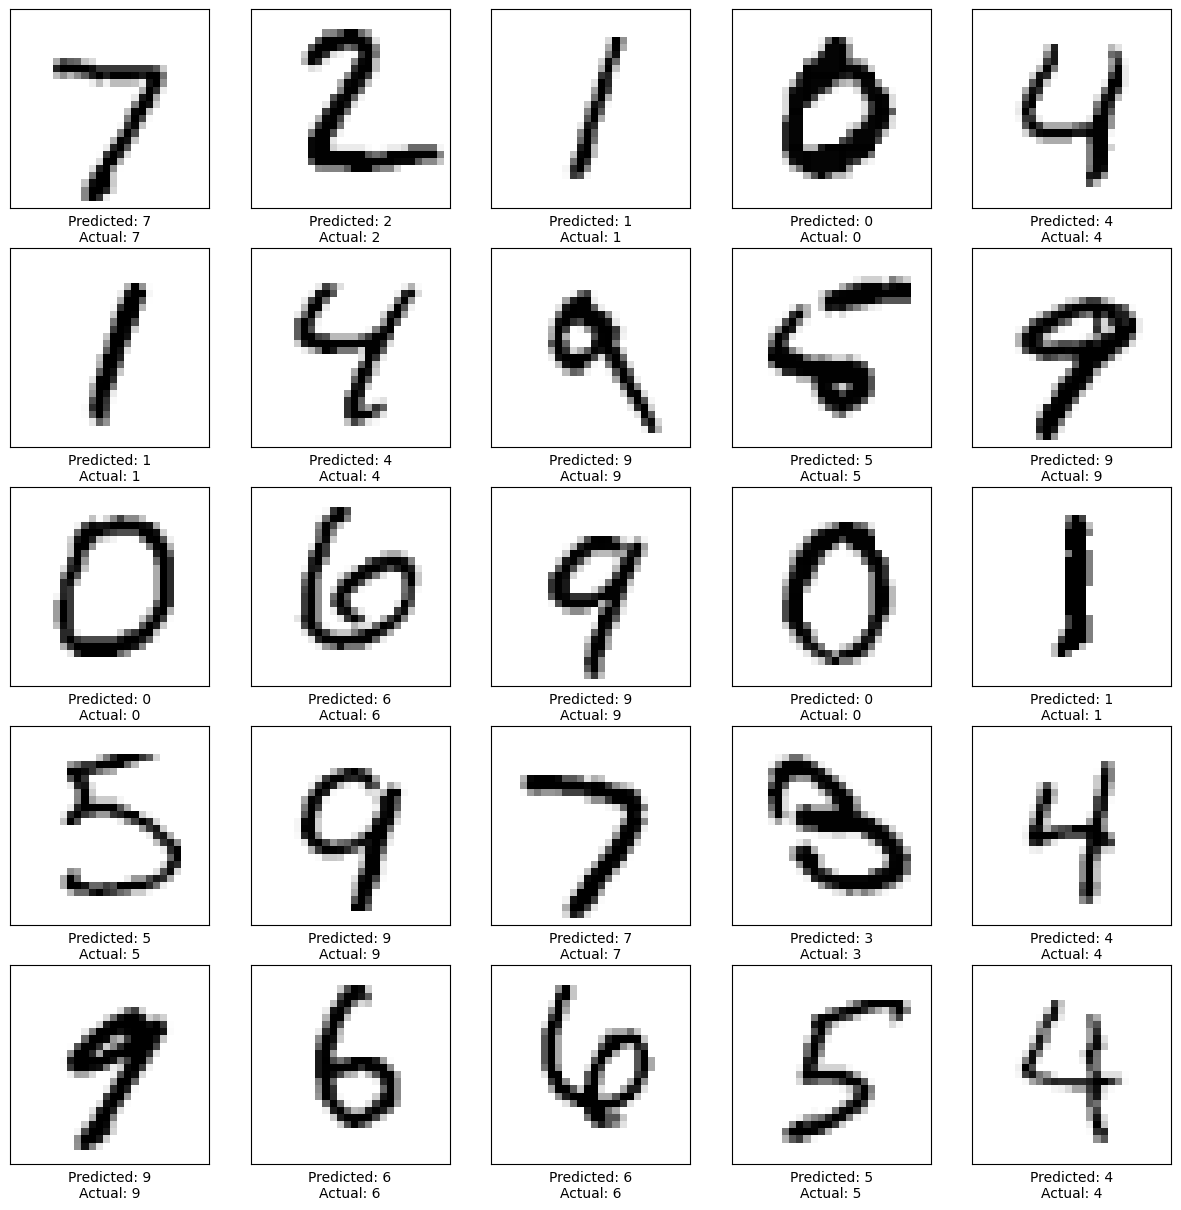

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


(train_images, train_labels), (test_images, test_labels) = mnist.load_data("noisy_mnist.csv")

train_images, test_images = train_images / 255.0, test_images / 255.0  # Normalize the pixel values to be between 0 and 1


model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy:", test_acc)

sample_images = test_images[:25]             # 25 images from the test dataset

predictions = model.predict(sample_images)


plt.figure(figsize=(15, 15))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.imshow(sample_images[i], cmap=plt.cm.binary)
  plt.xlabel(f"Predicted: {tf.argmax(predictions[i])}\nActual: {test_labels[i]}")
  plt.xticks([])
  plt.yticks([])
plt.show()

## CNN

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.5956 - loss: 1.1862 - val_accuracy: 0.9058 - val_loss: 0.3069
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9124 - loss: 0.2871 - val_accuracy: 0.9477 - val_loss: 0.1749
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9486 - loss: 0.1770 - val_accuracy: 0.9623 - val_loss: 0.1196
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9635 - loss: 0.1212 - val_accuracy: 0.9732 - val_loss: 0.0901
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9705 - loss: 0.0992 - val_accuracy: 0.9748 - val_loss: 0.0781
313/313 - 2s - 5ms/step - accuracy: 0.9748 - loss: 0.0781

Test accuracy: 0.9747999906539917
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


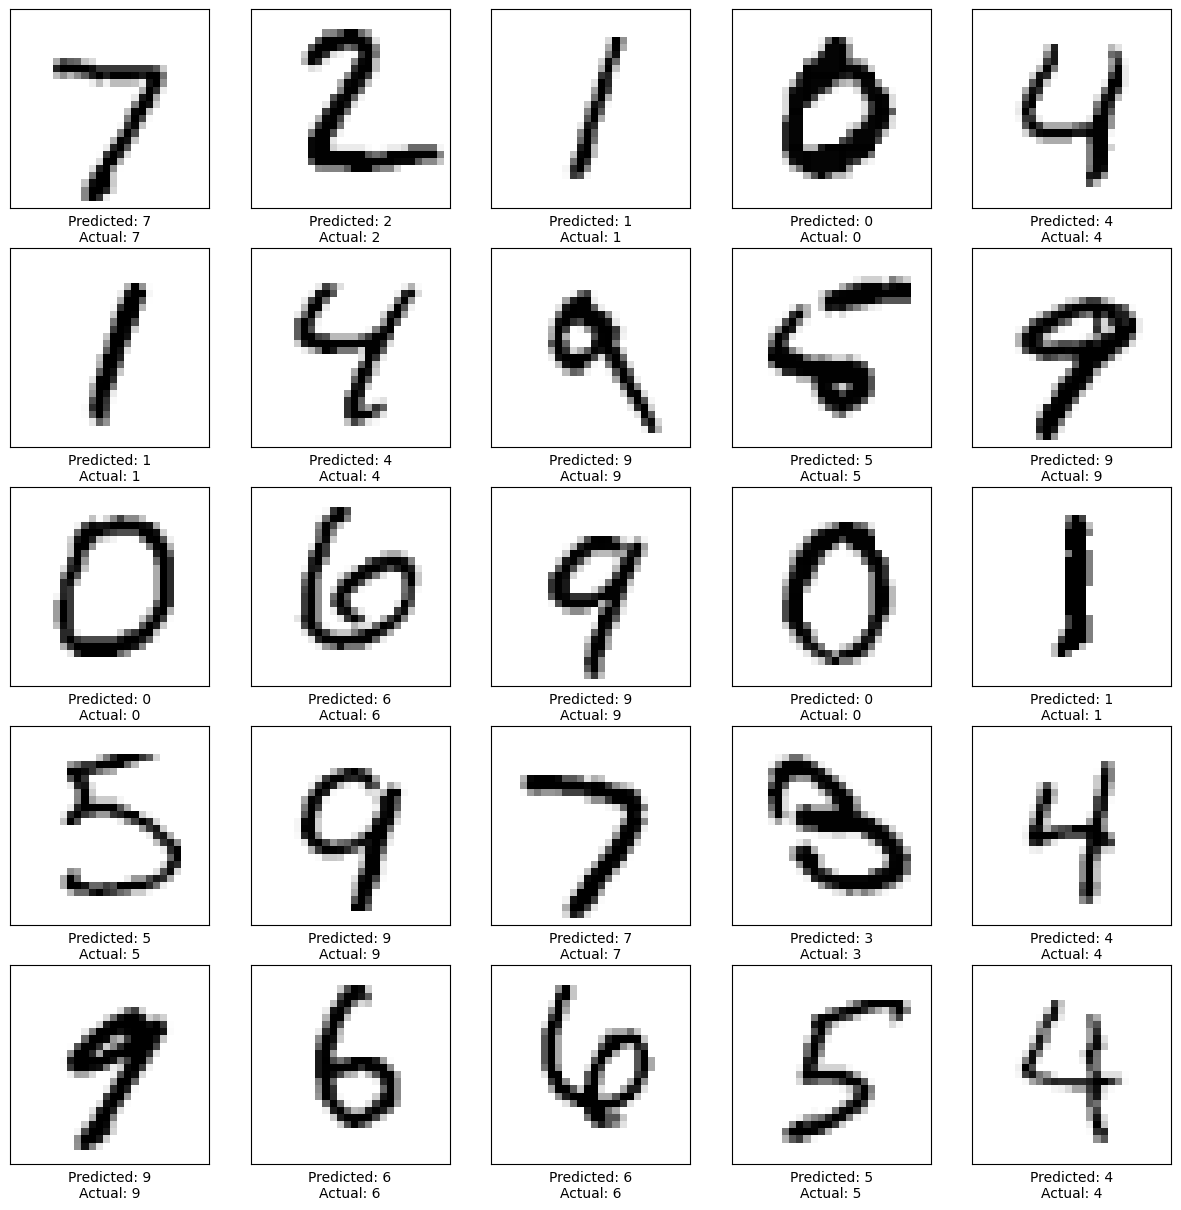

In [3]:

# Add a channel dimension to the images
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

# Normalize the pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy:", test_acc)

# Make predictions on 25 images from the test dataset
sample_images = test_images[:25]
predictions = model.predict(sample_images)

# Display the images and their predicted labels
plt.figure(figsize=(15, 15))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f"Predicted: {tf.argmax(predictions[i])}\nActual: {test_labels[i]}")
    plt.xticks([])
    plt.yticks([])
plt.show()